PROBLEMA

\begin{equation*}
\frac{\partial}{\partial x}\left(k \frac{\partial T}{\partial x}\right)+\frac{\partial}{\partial y}\left(k \frac{\partial T}{\partial y}\right)=0
\end{equation*}

Paso 1: Inicializar

In [73]:
import numpy as np
import matplotlib.pyplot as plt

Paso 2: Construir malla bidimensional

In [74]:
Lx=1.                            # Longitud de la placa en eje x 
Ly=1.                            # Longitud de la placa en el eje y
nx=15                            # Numero de nodos en x
ny=nx                            # Numero de nodos en y
dx=Lx/(nx-1)                     # Delta x
dy=Ly/(ny-1)                     # Delta y 
x = np.linspace(0, Lx, nx)		 # Malla en x
y = np.linspace(0, Ly, ny)       # Malla en y

Paso 3: Condiciones de frontera

In [75]:
Ttop=10                          # Temperatura cara superior
Tbottom=0                        # Temperatura cara inferior          
Tleft=0                          # Temperatura cara izquierda
Tright=0                         # Temperatura cara derecha
T=np.array(np.zeros((nx,ny)))    # Matriz de temperaturas 
T[:,(nx-1):]=Tright              # Condición de frontera derecha
T[:,:1]=Tleft                    # Condición de frontera izquierda
T[(ny-1):,:]=Tbottom             # Condicion de frontera superior
T[:1,:]=Ttop                     # Condición de frontera inferior

Paso 4: Criterio de convergencia

In [76]:
tol=0.0001      # Criterio de convergencia
error=1000      # Inicializar el error
iter=0          # Contador

Paso 5: SOLVER - Diferencias finitas (Gauss - Seidel)

In [77]:
while error>tol:                 
    Told=np.copy(T)
    for i in range(1,nx-1):
        for j in range (1,ny-1):
            T[i,j]=(T[i-1][j]+T[i+1][j]+T[i][j-1]+T[i][j+1])*0.25 
    error=np.max(np.abs(np.array(Told-T)))     
    iter=iter+1

Paso 6: Gráfico

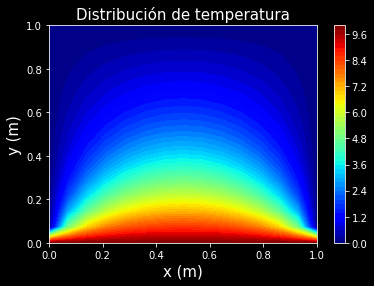

In [78]:
colorinterpolation = 50    			
colourMap = plt.cm.jet 					
X, Y = np.meshgrid(x,y)
plt.title("Distribución de temperatura", fontsize=15)
plt.contourf(X, Y, T, colorinterpolation, cmap=colourMap)
plt.xlabel("x (m)", fontsize=15)
plt.ylabel("y (m)", fontsize=15)
plt.xlim(0, 1)
plt.ylim(0, 1)
plt.colorbar()
plt.show()